In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

In [3]:
# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

In [4]:
# Get the HTML content of the webpage
html = browser.html

# Create a BeautifulSoup object
soup = BeautifulSoup(html, 'html.parser')

In [19]:
# Find all table rows with class "data-row"
table_rows = soup.find_all('tr', class_='data-row')

# Initialize an empty list to store rows of data
data = []

# Extract data from each row and append to the list
for row in table_rows:
    # Extract text from each cell in the row
    row_data = [cell.text.strip() for cell in row.find_all('td')]
    # Append row data to the list
    data.append(row_data)

# Create a DataFrame
df = pd.DataFrame(data)

# Rename columns
new_column_names = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
df.columns = new_column_names

# Display the DataFrame
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [20]:
# Examine data type of each column
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [21]:
# Convert 'terrestrial_date' column to datetime type
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Specify the desired data types for other columns
data_types = {
    'id': 'object',
    'terrestrial_date': 'datetime64[ns]',
    'sol': 'int64',
    'ls': 'int64',
    'month': 'int64',
    'min_temp': 'float64',
    'pressure': 'float64'
}

# Convert columns to the specified data types
df = df.astype(data_types)

In [22]:
# Display the DataFrame
print(df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


In [26]:
# Count the occurrences of each month
month_counts = df['month'].value_counts().sort_index()

# Print the result
month_counts


month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64

In [27]:
# 2. How many Martian days' worth of data are there?
num_sols = df['sol'].nunique()

# Print the result
print("Number of Martian days' worth of data:", num_sols)

Number of Martian days' worth of data: 1867


In [28]:
# Group the DataFrame by month and calculate the average low temperature
average_low_temp_by_month = df.groupby('month')['min_temp'].mean()

# Print the result
print("Average low temperature by month:")
print(average_low_temp_by_month)

Average low temperature by month:
month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


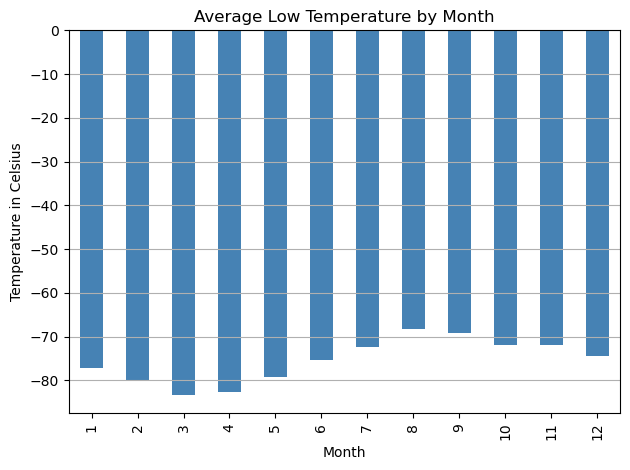

In [33]:
# Plot the average temperature by month
average_low_temp_by_month.plot(kind='bar', color='steelblue')

# Set the title and labels
plt.title('Average Low Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')

# Show the plot
plt.grid(axis='y')
plt.tight_layout()
plt.show()

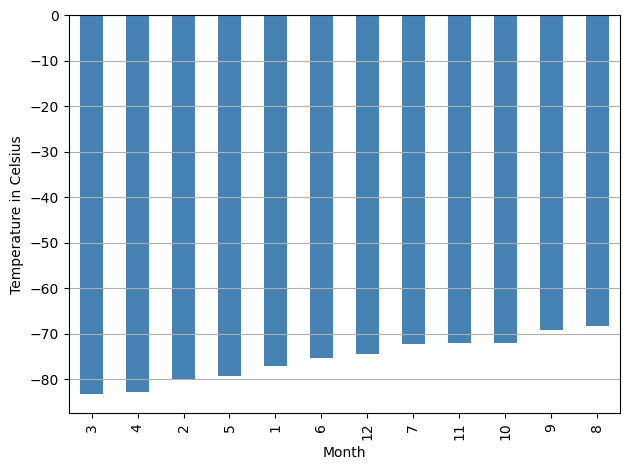

In [35]:
# Sort the average temperatures by month
sorted_average_low_temp = average_low_temp_by_month.sort_values()

# Plot the average temperature by month
sorted_average_low_temp.plot(kind='bar', color='steelblue')

# Set the title and labels
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')

# Show the plot
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [37]:
# Group the DataFrame by month and calculate the average pressure
average_pressure_by_month = df.groupby('month')['pressure'].mean()

# Print the result
print(average_pressure_by_month)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


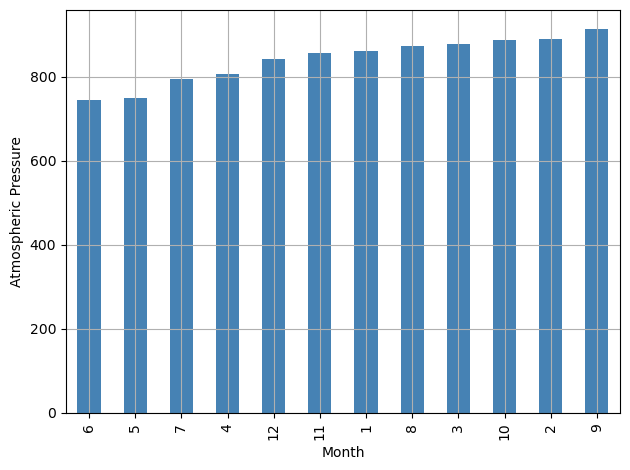

In [42]:
# Sort the average pressure values by Martian month
sorted_average_pressure_by_month = average_pressure_by_month.sort_values()

# Plot the average pressure by month
sorted_average_pressure_by_month.plot(kind='bar', color='steelblue')

# Set the title and labels
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

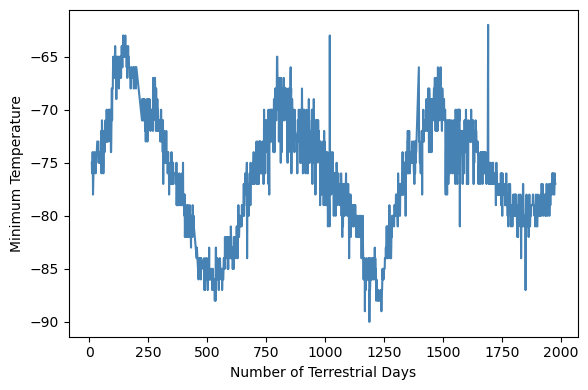

In [57]:
# Plot the minimum temperature against the number of terrestrial days
plt.figure(figsize=(6, 4))
plt.plot(df['sol'], df['min_temp'], linestyle='-', color='steelblue')

# Add labels and title
plt.xlabel('Number of Terrestrial Days')
plt.ylabel('Minimum Temperature')

# Show plot
plt.tight_layout()
plt.show()

In [58]:
print("Temperature Analysis:")
print("- On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. This indicates that there is a seasonal variation in temperatures on Mars, with the colder months occurring around the third month and the warmer months around the eighth month. However, it's important to note that even during the warmest month, temperatures on Mars remain very cold in human terms.")

print("\nAtmospheric Pressure Analysis:")
print("- Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth. This suggests that there is also a seasonal variation in atmospheric pressure on Mars, with the lowest pressure occurring around the sixth month and the highest pressure around the ninth month.")

print("\nMartian Year Duration:")
print("- The distance from peak to peak, as observed in the plot of temperature against the number of terrestrial days, is roughly 1425-750, or 675 days. This indicates that a year on Mars appears to be about 675 days based on the data. An internet search confirms that a Mars year is equivalent to 687 Earth days, which is close to the estimated value from the plot.")

Temperature Analysis:
- On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. This indicates that there is a seasonal variation in temperatures on Mars, with the colder months occurring around the third month and the warmer months around the eighth month. However, it's important to note that even during the warmest month, temperatures on Mars remain very cold in human terms.

Atmospheric Pressure Analysis:
- Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth. This suggests that there is also a seasonal variation in atmospheric pressure on Mars, with the lowest pressure occurring around the sixth month and the highest pressure around the ninth month.

Martian Year Duration:
- The distance from peak to peak, as observed in the plot of temperature against the number of terrestrial days, is roughly 1425-750, or 675 days. This indicates that a year on Mars appears to be about 675 days based on the d

In [59]:
# Write the DataFrame to a CSV file
df.to_csv('mars_data.csv', index=False)

print("Data has been successfully written to 'mars_data.csv' file.")

Data has been successfully written to 'mars_data.csv' file.


In [ ]:
browser.quit()